In [173]:
import yfinance as yf 
import pandas as pd 
import time 
import talib as ta
import numpy as np 
import tensorflow as tf
from matplotlib import pyplot

from numpy import sqrt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import regularizers

# Data Collection

In [174]:
data = pd.read_csv('options_data.csv')
data

,Unnamed: 0,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,RSI,UpperBand,MiddleBand,LowerBand
0,0,AAPL240802C00100000,2024-07-29 16:08:35+00:00,100.0,118.68,120.75,122.55,0.000000,0.000000,12.0,19.0,4.363286,1.0,REGULAR,USD,C,NaN,NaN,NaN,NaN
1,1,AAPL240802C00115000,2024-07-01 14:19:54+00:00,115.0,100.06,106.65,107.60,0.000000,0.000000,4.0,4.0,2.718753,1.0,REGULAR,USD,C,NaN,NaN,NaN,NaN
2,2,AAPL240802C00125000,2024-07-31 19:34:43+00:00,125.0,96.85,96.65,97.60,4.720001,5.123197,28.0,7.0,2.390629,1.0,REGULAR,USD,C,NaN,NaN,NaN,NaN
3,3,AAPL240802C00135000,2024-07-31 19:20:21+00:00,135.0,86.95,85.80,87.60,2.829994,3.364234,2.0,10.0,2.910159,1.0,REGULAR,USD,C,NaN,NaN,NaN,NaN
4,4,AAPL240802C00140000,2024-07-31 19:20:21+00:00,140.0,81.95,80.80,82.60,3.699997,4.728431,8.0,2.0,2.724613,1.0,REGULAR,USD,C,NaN,122.304479,96.898,71.491521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,2998,NKE240802P00101000,2024-06-20 15:11:32+00:00,101.0,7.25,26.15,30.30,0.000000,0.000000,NaN,0.0,4.000982,1.0,REGULAR,USD,P,41.665291,31.101177,16.458,1.814823
2999,2999,NKE240802P00103000,2024-06-14 15:05:25+00:00,103.0,10.58,27.55,31.65,0.000000,0.000000,NaN,0.0,3.715821,1.0,REGULAR,USD,P,47.199688,28.599424,14.304,0.008576
3000,3000,NKE240802P00104000,2024-06-14 13:47:31+00:00,104.0,10.74,28.55,32.45,0.000000,0.000000,NaN,0.0,3.710938,1.0,REGULAR,USD,P,47.457625,23.002717,11.802,0.601283
3001,3001,NKE240802P00105000,2024-07-05 15:08:12+00:00,105.0,29.59,28.25,31.95,0.000000,0.000000,1.0,0.0,4.122075,1.0,REGULAR,USD,P,67.562470,29.831959,13.192,-3.447959


# Feature Engineering

In [175]:
#feature engineering 
data['RSI'] = ta.RSI(data['lastPrice'], 14)
data['UpperBand'], data['MiddleBand'], data['LowerBand'] = ta.BBANDS(data['lastPrice']) 
data

,Unnamed: 0,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,RSI,UpperBand,MiddleBand,LowerBand
0,0,AAPL240802C00100000,2024-07-29 16:08:35+00:00,100.0,118.68,120.75,122.55,0.000000,0.000000,12.0,19.0,4.363286,1.0,REGULAR,USD,C,NaN,NaN,NaN,NaN
1,1,AAPL240802C00115000,2024-07-01 14:19:54+00:00,115.0,100.06,106.65,107.60,0.000000,0.000000,4.0,4.0,2.718753,1.0,REGULAR,USD,C,NaN,NaN,NaN,NaN
2,2,AAPL240802C00125000,2024-07-31 19:34:43+00:00,125.0,96.85,96.65,97.60,4.720001,5.123197,28.0,7.0,2.390629,1.0,REGULAR,USD,C,NaN,NaN,NaN,NaN
3,3,AAPL240802C00135000,2024-07-31 19:20:21+00:00,135.0,86.95,85.80,87.60,2.829994,3.364234,2.0,10.0,2.910159,1.0,REGULAR,USD,C,NaN,NaN,NaN,NaN
4,4,AAPL240802C00140000,2024-07-31 19:20:21+00:00,140.0,81.95,80.80,82.60,3.699997,4.728431,8.0,2.0,2.724613,1.0,REGULAR,USD,C,NaN,122.304479,96.898,71.491521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,2998,NKE240802P00101000,2024-06-20 15:11:32+00:00,101.0,7.25,26.15,30.30,0.000000,0.000000,NaN,0.0,4.000982,1.0,REGULAR,USD,P,41.665291,31.101177,16.458,1.814823
2999,2999,NKE240802P00103000,2024-06-14 15:05:25+00:00,103.0,10.58,27.55,31.65,0.000000,0.000000,NaN,0.0,3.715821,1.0,REGULAR,USD,P,47.199688,28.599424,14.304,0.008576
3000,3000,NKE240802P00104000,2024-06-14 13:47:31+00:00,104.0,10.74,28.55,32.45,0.000000,0.000000,NaN,0.0,3.710938,1.0,REGULAR,USD,P,47.457625,23.002717,11.802,0.601283
3001,3001,NKE240802P00105000,2024-07-05 15:08:12+00:00,105.0,29.59,28.25,31.95,0.000000,0.000000,1.0,0.0,4.122075,1.0,REGULAR,USD,P,67.562470,29.831959,13.192,-3.447959


# Data Cleaning

In [176]:
#Relevant Columns 
cleaned_data = data[['strike', 'lastPrice', 'openInterest', 'impliedVolatility', 'inTheMoney', 'optionType', 'RSI', 'MiddleBand', 'percentChange']]
cleaned_data['inTheMoney'] = cleaned_data['inTheMoney'].astype(int)
char_map = {'C':1, 'P':2}
cleaned_data['optionType'] = cleaned_data['optionType'].map(char_map)
cleaned_data = cleaned_data.dropna()
cleaned_data

/var/folders/_m/qwr8c6113gx_nwdv33lh3ttr0000gn/T/ipykernel_1424/1375665417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['inTheMoney'] = cleaned_data['inTheMoney'].astype(int)
/var/folders/_m/qwr8c6113gx_nwdv33lh3ttr0000gn/T/ipykernel_1424/1375665417.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['optionType'] = cleaned_data['optionType'].map(char_map)


,strike,lastPrice,openInterest,impliedVolatility,inTheMoney,optionType,RSI,MiddleBand,percentChange
14,190.0,32.74,777.0,0.869142,1,1,0.000000,42.698,10.795271
15,195.0,27.37,9901.0,0.764651,1,1,0.000000,37.592,14.089209
16,197.5,24.55,270.0,0.701175,1,1,0.000000,32.908,14.505591
17,200.0,22.91,9875.0,0.683597,1,1,0.000000,29.118,16.294410
18,202.5,19.54,144.0,0.652347,1,1,0.000000,25.422,28.299417
...,...,...,...,...,...,...,...,...,...
2998,101.0,7.25,0.0,4.000982,1,2,41.665291,16.458,0.000000
2999,103.0,10.58,0.0,3.715821,1,2,47.199688,14.304,0.000000
3000,104.0,10.74,0.0,3.710938,1,2,47.457625,11.802,0.000000
3001,105.0,29.59,0.0,4.122075,1,2,67.562470,13.192,0.000000


# Preprocessing

In [177]:
df = cleaned_data
# TRAIN, TEST AND VALIDATION SPLIT 
train_val_df = df.sample(frac=0.8, random_state=4)  # 80% for train+validation
test_df = df.drop(train_val_df.index)               # 20% for test

# Split train+validation into training and validation sets
train_df = train_val_df.sample(frac=0.60, random_state=4)  
val_df = train_val_df.drop(train_df.index)                  


In [178]:
#Normalizing value - (min value of the column) / (range of the column)
max_val = train_df.max(axis=0)
min_val = train_df.min(axis=0)
range_val = max_val - min_val

train_df = (train_df - min_val) / range_val
val_df = (val_df - min_val) / range_val
test_df = (test_df - min_val) / range_val


In [179]:
# separate target and labels
X_train = train_df.drop('impliedVolatility',axis=1)
X_val = val_df.drop('impliedVolatility',axis=1)
X_test = test_df.drop('impliedVolatility', axis=1)

y_train = train_df['impliedVolatility']
y_val = val_df['impliedVolatility']
y_test = test_df['impliedVolatility']
 
input_shape = [X_train.shape[1]]


# Model

In [180]:
#Define Model 

model = Sequential()
model.add(Input(shape=(input_shape[0],)))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

In [181]:
#Compile Model
model.compile(optimizer='adam', loss='mse')
#Fit Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=50, verbose=0)
#Evaluate Model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))

MSE: 0.022, RMSE: 0.148


In [182]:
#Predictions
predictions = model.predict(X_test)
predictions[0:10]

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[0.063267  ],
       [0.06135671],
       [0.06076267],
       [0.05918338],
       [0.04589269],
       [0.04497447],
       [0.04543928],
       [0.04393914],
       [0.04453991],
       [0.05040522]], dtype=float32)

In [183]:
print(f'Length of y_test: {len(y_test)}')
y_test[0:10]

Length of y_test: 598


14    0.040425
15    0.035565
20    0.028252
23    0.031023
26    0.026651
30    0.024550
36    0.025163
37    0.025617
46    0.040697
62    0.053779
Name: impliedVolatility, dtype: float64

# Visualizations

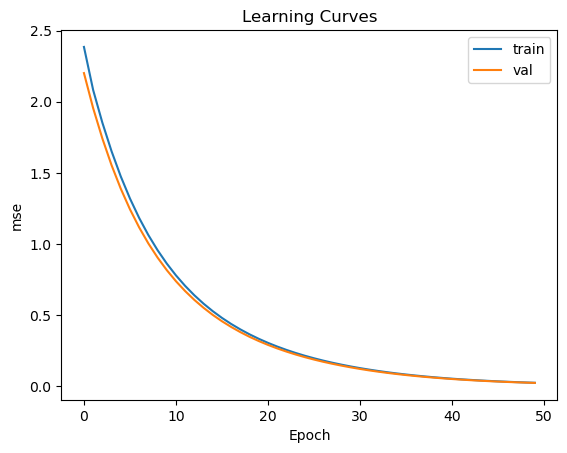

In [184]:
#Learning Curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('mse')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3

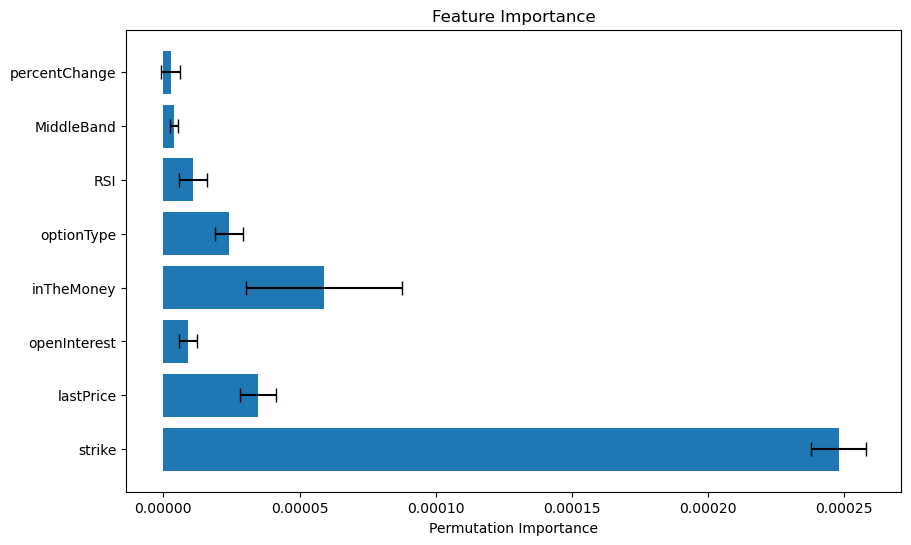

In [185]:
#Feature Importance 
from sklearn.inspection import permutation_importance

results = permutation_importance(model, X_val, y_val, scoring='neg_mean_squared_error')

importance = results.importances_mean
std = results.importances_std

features = X_train.columns
pyplot.figure(figsize=(10, 6))
pyplot.barh(features, importance, xerr=std, capsize=5)
pyplot.xlabel('Permutation Importance')
pyplot.title('Feature Importance')
pyplot.show()


Length of y_test: 598
Length of predictions: 598


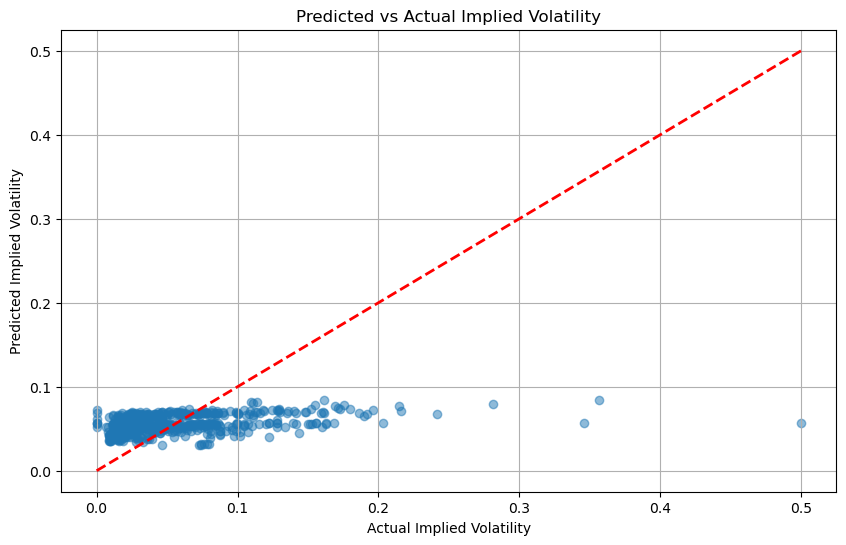

In [186]:
# Predicted vs Actual scatter plot
predictions = predictions.flatten()

# Check if both are the same length
print(f'Length of y_test: {len(y_test)}')
print(f'Length of predictions: {len(predictions)}')

pyplot.figure(figsize=(10, 6))
pyplot.scatter(y_test, predictions, alpha=0.5)
pyplot.xlabel('Actual Implied Volatility')
pyplot.ylabel('Predicted Implied Volatility')
pyplot.title('Predicted vs Actual Implied Volatility')
pyplot.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
pyplot.grid(True)
pyplot.show()

